# Simple LSTM

In [ ]:
## 1) data 는 0 ~ 99 까지의 연속된 숫자이고, target 은 (1 ~ 101) * 2 으로 구성한다. 입력  data 에 대응하는 출력 data 를 예측하는 model 을 LSTM 으로 작성

## 연속된 5 개의 숫자를 보고 다음 숫자를 알아맞추도록 LSTM 을 이용한 model 작성

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Training Data 작성 요령

In [ ]:
numbers = [[i] for i in range(105)]
numbers[:5]

[[0], [1], [2], [3], [4]]

In [ ]:
# 순서가 있는 데이터를 만들어주는 것
# window size = 5
# 연속된 숫자가 있을때, 마지막 숫자의 2배가 되는 숫자를 맞춰라
data = []
target = []
for i in range(5, len(numbers)):
    data.append(numbers[i-5: i]) # 5부터 시작해서 i-5
    target.append(numbers[i][0] * 2)

print(data[5]) # [[5], [6], [7], [8], [9]]
print(target[5]) # 20

[[5], [6], [7], [8], [9]]
20


In [ ]:
# 파이썬 List는 사용할 수 없으므로 -> numpy ndarray로 변환
data = np.array(data, dtype="float32")
target = np.array(target, dtype="float32")

data.shape, target.shape # ((100, 5, 1), (100,)) : 5 -> time step / 1 -> feature

((100, 5, 1), (100,))

### 스케일링을 하지 않은 경우

In [ ]:
model = Sequential()
model.add(LSTM(16, input_shape=(5, 1)))
model.add(Dense(1)) # 연속된 숫자 알아맞추기 이므로 1

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


In [ ]:
# 모델 훈련
history = model.fit(data, target, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 89.1347 - mae: 89.1347 - val_loss: 189.1433 - val_mae: 189.1433
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 89.9341 - mae: 89.9341 - val_loss: 189.1223 - val_mae: 189.1223
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0588 - mae: 87.0588 - val_loss: 189.1014 - val_mae: 189.1014
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 88.1984 - mae: 88.1984 - val_loss: 189.0791 - val_mae: 189.0791
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0123 - mae: 87.0123 - val_loss: 189.0530 - val_mae: 189.0530
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.5910 - mae: 90.5910 - val_loss: 189.0187 - val_mae: 189.0187
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 89.6802 - mae: 89.6802 - val_loss: 188.9718 - val_mae: 188.9718
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.4714 - mae: 90.4714 - val_loss: 188.9095 - val_mae: 188.9095
Epoch 9/500
3/3 ━━━━━━━

In [ ]:
# 간단해서 test data를 만듬
test_data = [[35], [36], [37], [38], [39]]
x = np.array(test_data, dtype="float32").reshape(1, 5, 1)

# 예측
model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[3338.254]], dtype=float32)

In [ ]:
test_data = [[5], [6], [7], [8], [9]]
x = np.array(test_data, dtype="float32") / 100.

model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[125.34783]], dtype=float32)

In [ ]:
test_data = [[60], [61], [62], [63], [64]]
x = np.array(test_data, dtype="float32") / 100.

model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[233.26263]], dtype=float32)

### 스케일링을 한 경우

In [ ]:
# Normalize
data = data / 100.
target = target / 100.

In [ ]:
model = Sequential()
model.add(LSTM(16, input_shape=(5, 1)))
model.add(Dense(1)) # 연속된 숫자 알아맞추기 이므로 1

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mae', metrics=['mae'])


In [ ]:
# 모델 훈련
history = model.fit(data, target, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.8125 - mae: 0.8125 - val_loss: 1.7535 - val_mae: 1.7535
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8169 - mae: 0.8169 - val_loss: 1.7103 - val_mae: 1.7103
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8129 - mae: 0.8129 - val_loss: 1.6673 - val_mae: 1.6673
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7655 - mae: 0.7655 - val_loss: 1.6245 - val_mae: 1.6245
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7740 - mae: 0.7740 - val_loss: 1.5814 - val_mae: 1.5814
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7214 - mae: 0.7214 - val_loss: 1.5379 - val_mae: 1.5379
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7250 - mae: 0.7250 - val_loss: 1.4934 - val_mae: 1.4934
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6585 - mae: 0.6585 - val_loss: 1.4478 - val_mae: 1.4478
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6420 - mae:

In [ ]:
test_data = [[35], [36], [37], [38], [39]]

x = np.array(test_data, dtype="float32") / 100.

model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[79.845116]], dtype=float32)

In [ ]:
test_data = [[5], [6], [7], [8], [9]]
x = np.array(test_data, dtype="float32") / 100.

model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[20.596731]], dtype=float32)

In [ ]:
test_data = [[60], [61], [62], [63], [64]]
x = np.array(test_data, dtype="float32") / 100.

model.predict(x.reshape(1, 5, 1)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[130.29362]], dtype=float32)

# LSTM을 이용한 주가 예측

데이터 : Yahoo finance data

모델 : Apple 주식의 가격 추세 예측 (지난 window-size 일의 역사적 가격을 사용하여 시간 t의 가격을 예측)

→ 추세를 파악

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense, Lambda

- Apple 주식 가격 예측

In [ ]:
aapl = yf.download('AAPL', start='2018-01-01', end='2022-12-31', progress=False)
aapl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517281,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168926,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016014,43.587502,43.902500,43.482498,43.587502,82271200


<Axes: xlabel='Date'>

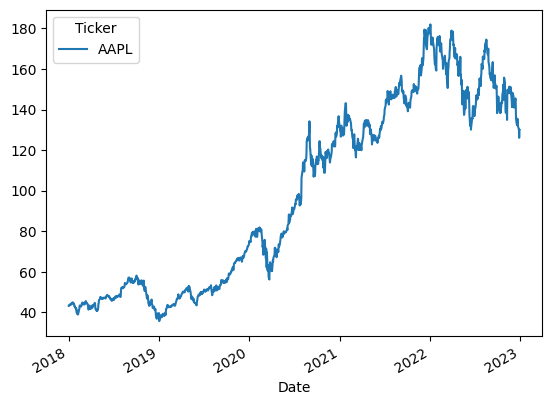

In [ ]:
# 애플 주가 그래프 그리기
aapl.Close.plot()

In [ ]:
aapl

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517281,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168926,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016014,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2022-12-23,130.487778,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.676834,130.029999,131.410004,128.720001,131.380005,69007800


In [ ]:
aapl.shape

(1259, 6)

In [ ]:
hist = []
target = []
window = 3
close = aapl['Close'].values  # 종가

for i in range(len(close) - window): # 윈도우 개수만큼 남기도록
    x = close[i:i+window]
    y = close[i+window]
    hist.append(x)
    target.append(y)

In [ ]:
close[:10]

array([[43.06499863],
       [43.05749893],
       [43.25749969],
       [43.75      ],
       [43.58750153],
       [43.58250046],
       [43.57249832],
       [43.81999969],
       [44.27249908],
       [44.04750061]])

In [ ]:
hist[:5] # 하나씩 움직이며 윈도우 개수만큼 가짐

[array([[43.06499863],
        [43.05749893],
        [43.25749969]]),
 array([[43.05749893],
        [43.25749969],
        [43.75      ]]),
 array([[43.25749969],
        [43.75      ],
        [43.58750153]]),
 array([[43.75      ],
        [43.58750153],
        [43.58250046]]),
 array([[43.58750153],
        [43.58250046],
        [43.57249832]])]

In [ ]:
target[:5]

[array([43.75]),
 array([43.58750153]),
 array([43.58250046]),
 array([43.57249832]),
 array([43.81999969])]

In [ ]:
# hist"의 각 요소는 window개 timestep의 list입니다.
# => 1씩 증가하기 때문에 "hist"의 두 번째 요소의 마지막 항목은 "target"의 첫 번째 요소와 같아야 합니다.
# 또한 마지막 숫자가 같아야 합니다.
# print(close[-1])
# print(i+length)
# print(target[-1])

hist[1][-1] == target[0] # True

array([ True])

In [ ]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1, 1)
print(hist.shape) # 1835, 3 : 3일치의 데이터를 받아서
print(target.shape) # 1835, 1 : 다음날 하루의 종가를 알아맞추도록

(1256, 3, 1)
(1256, 1)


In [ ]:
# train/test split : 독립적이지 않으므로 shuffle 하면 안되므로 패키지 사용 불가
# 1098일의 데이터로 모델을 학습시키고 다음 100일의 데이터로 테스트하는 방식으로 데이터를 분할
split = len(hist) - 100
X_train = hist[:split]
X_test = hist[split:]
y_train = target[:split]
y_test = target[split:]

print(split)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

1156


((1156, 3, 1), (100, 3, 1), (1156, 1), (100, 1))

In [ ]:
# time sequence가 없으므로 차원이 하나 더 늘어야하므로 reshape -> 3D가 되어야함
X_train = X_train.reshape(-1, window, 1)
X_test = X_test.reshape(-1, window, 1)

X_train.shape, X_test.shape

((1156, 3, 1), (100, 3, 1))

In [ ]:
model = tf.keras.Sequential()
# 첫번째 LSTM과 두번째 LSTM이 연결되어야하므로 return_sequences를 주어야함
# 3개의 LSTM 셀을 쌓음
model.add(LSTM(units=64, return_sequences=True, input_shape=(window, 1), dropout=0.2))
model.add(LSTM(units=32, return_sequences=True, dropout=0.2))
model.add(LSTM(units=16, dropout=0.2))
# Dense 레이어와 연결
model.add(Dense(units=1))
model.add(Lambda(lambda x: x * 100))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 3, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_4 (Lambda)                    │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 예측
history = model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6689.3501
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2568.8999
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 755.8473
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 669.9937
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 587.3352
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 549.9827
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 548.9605
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 489.4648
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 581.0385
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 573.4046
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 515.6681
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 456.9655
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 519.0480
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 475.9426
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0

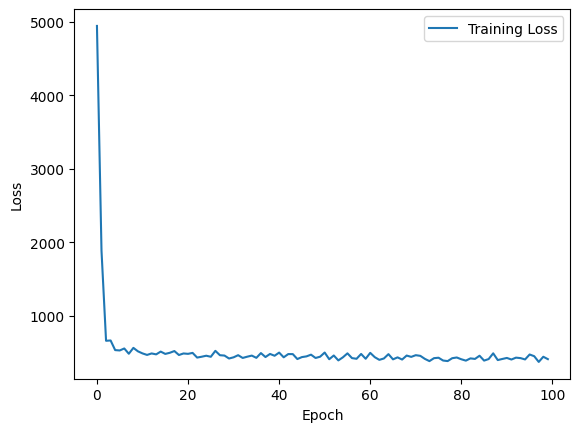

In [ ]:
# 훈련 동안의 loss 변화 시각화
plt.plot(history.history['loss'])
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

앞으로 100일 동안의 주가 추이를 예측해 보도록 하겠습니다. 우리의 목표는 실제 가격이 아니라 추세를 예측하는 것임을 기억하십시오.

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


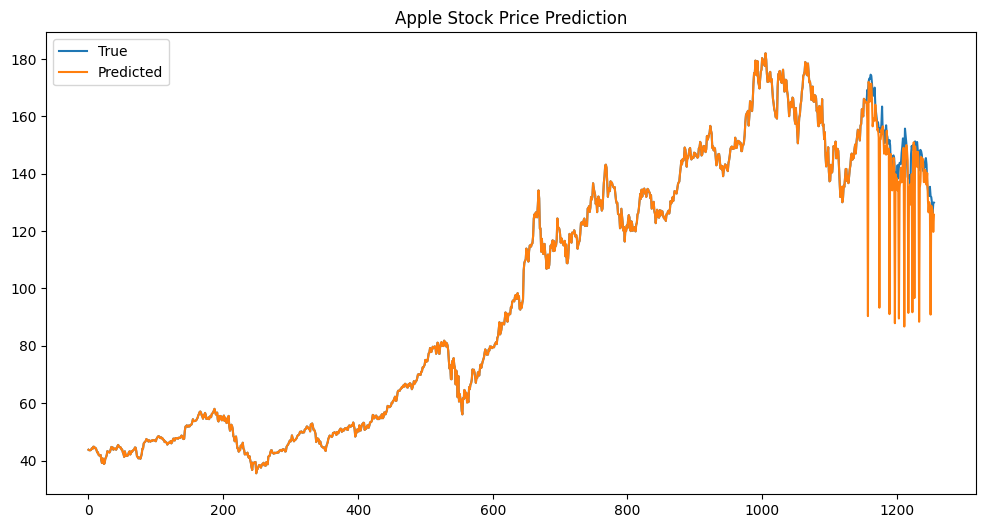

In [ ]:
# 앞으로 100일동안의 주가 추이 예측
pred = model.predict(X_test)

# 예측과 실제 비교한 시각화
plt.figure(figsize=(12,6))
plt.plot(np.concatenate((y_train, y_test)), label='True')
plt.plot(np.concatenate((y_train, pred)), label='Predicted')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

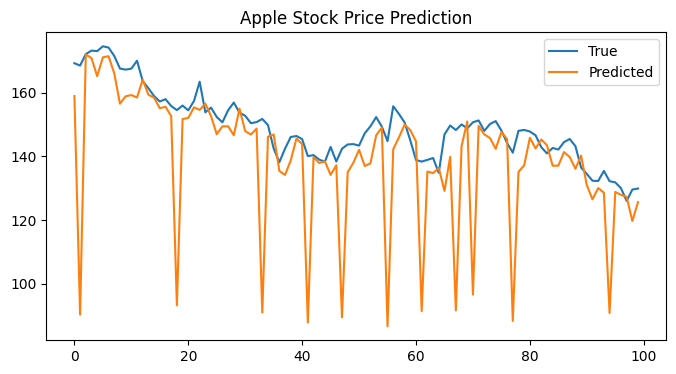

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(y_test, label='True')
plt.plot( pred, label='Predicted')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

## 다양한 window_size tuning 을 하여 보다 정확한 예측 시도

In [125]:
aapl = yf.download('AAPL', start='2018-01-01', end='2022-12-31', progress=False)
aapl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517281,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168926,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016014,43.587502,43.902500,43.482498,43.587502,82271200


In [129]:
results = {}  # 각 윈도우 크기에 대해 성능 저장

for window in range(3, 14, 1):
    aapl = yf.download('AAPL', start='2018-01-01', end='2022-12-31', progress=False)

    hist = []
    target = []
    for i in range(len(close) - window):
        x = close[i:i+window]
        y = close[i+window]
        hist.append(x)
        target.append(y)

    hist = np.array(hist)
    target = np.array(target).reshape(-1, 1)

    # train/test split : 독립적이지 않으므로 shuffle 하면 안되므로 패키지 사용 불가
    # 1098일의 데이터로 모델을 학습시키고 다음 100일의 데이터로 테스트하는 방식으로 데이터를 분할
    split = len(hist) - 100
    X_train = hist[:split]
    X_test = hist[split:]
    y_train = target[:split]
    y_test = target[split:]

    # time sequence가 없으므로 차원이 하나 더 늘어야하므로 reshape -> 3D가 되어야함
    X_train = X_train.reshape(-1, window, 1)
    X_test = X_test.reshape(-1, window, 1)

    model = tf.keras.Sequential()
    # 첫번째 LSTM과 두번째 LSTM이 연결되어야하므로 return_sequences를 주어야함
    # 3개의 LSTM 셀을 쌓음
    model.add(LSTM(units=64, return_sequences=True, input_shape=(window, 1), dropout=0.2))
    model.add(LSTM(units=32, return_sequences=True, dropout=0.2))
    model.add(LSTM(units=16, dropout=0.2))
    # Dense 레이어와 연결
    model.add(Dense(units=1))
    model.add(Lambda(lambda x: x * 100))

    # 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # 테스트 평가
    loss = model.evaluate(X_test, y_test, verbose=0)
    results[window] = loss
    print(f"window size {window}, loss: {loss}")

# 최적의 윈도우 사이즈 출력
best_window = min(results, key=results.get)
print(f"최적의 윈도우 사이즈 : {best_window} | loss : {results[best_window]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 3, loss: 851.5308837890625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 4, loss: 579.986083984375


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 5, loss: 706.3358764648438


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 6, loss: 613.2276000976562


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 7, loss: 709.926025390625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 8, loss: 963.2265014648438


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 9, loss: 700.2222900390625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 10, loss: 711.5452880859375


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 11, loss: 580.81298828125


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 12, loss: 638.178955078125


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 13, loss: 749.9717407226562
최적의 윈도우 사이즈 : 4 | loss : 579.986083984375


In [128]:
results = {}  # 각 윈도우 크기에 대해 성능 저장

for window in range(14, 30, 1):
    aapl = yf.download('AAPL', start='2018-01-01', end='2022-12-31', progress=False)

    hist = []
    target = []
    for i in range(len(close) - window):
        x = close[i:i+window]
        y = close[i+window]
        hist.append(x)
        target.append(y)

    hist = np.array(hist)
    target = np.array(target).reshape(-1, 1)

    # train/test split : 독립적이지 않으므로 shuffle 하면 안되므로 패키지 사용 불가
    # 1098일의 데이터로 모델을 학습시키고 다음 100일의 데이터로 테스트하는 방식으로 데이터를 분할
    split = len(hist) - 100
    X_train = hist[:split]
    X_test = hist[split:]
    y_train = target[:split]
    y_test = target[split:]

    # time sequence가 없으므로 차원이 하나 더 늘어야하므로 reshape -> 3D가 되어야함
    X_train = X_train.reshape(-1, window, 1)
    X_test = X_test.reshape(-1, window, 1)

    model = tf.keras.Sequential()
    # 첫번째 LSTM과 두번째 LSTM이 연결되어야하므로 return_sequences를 주어야함
    # 3개의 LSTM 셀을 쌓음
    model.add(LSTM(units=64, return_sequences=True, input_shape=(window, 1), dropout=0.2))
    model.add(LSTM(units=32, return_sequences=True, dropout=0.2))
    model.add(LSTM(units=16, dropout=0.2))
    # Dense 레이어와 연결
    model.add(Dense(units=1))
    model.add(Lambda(lambda x: x * 100))

    # 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # 테스트 평가
    loss = model.evaluate(X_test, y_test, verbose=0)
    results[window] = loss
    print(f"window size {window}, loss: {loss}")

# 최적의 윈도우 사이즈 출력
best_window = min(results, key=results.get)
print(f"최적의 윈도우 사이즈 : {best_window} | loss : {results[best_window]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 14, loss: 768.3403930664062


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 15, loss: 806.2291259765625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 16, loss: 910.1502075195312


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 17, loss: 728.0653686523438


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 18, loss: 559.0488891601562


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 19, loss: 485.1611022949219


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 20, loss: 369.6248474121094


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 21, loss: 865.49560546875


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 22, loss: 865.7286987304688


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 23, loss: 553.6371459960938


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 24, loss: 1060.4344482421875


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 25, loss: 651.1383056640625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 26, loss: 580.9632568359375


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 27, loss: 635.1423950195312


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 28, loss: 678.3490600585938


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


window size 29, loss: 523.6870727539062
최적의 윈도우 사이즈 : 20 | loss : 369.6248474121094


In [155]:
aapl = yf.download('AAPL', start='2018-01-01', end='2022-12-31', progress=False)
aapl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517281,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168926,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016014,43.587502,43.902500,43.482498,43.587502,82271200


In [156]:
hist = []
target = []
window = 20
close = aapl['Close'].values  # 종가

for i in range(len(close) - window): # 윈도우 개수만큼 남기도록
    x = close[i:i+window]
    y = close[i+window]
    hist.append(x)
    target.append(y)

In [157]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1, 1)
print(hist.shape) # 1835, 3 : 3일치의 데이터를 받아서
print(target.shape) # 1835, 1 : 다음날 하루의 종가를 알아맞추도록

(1239, 20, 1)
(1239, 1)


In [158]:
# train/test split : 독립적이지 않으므로 shuffle 하면 안되므로 패키지 사용 불가
# 1098일의 데이터로 모델을 학습시키고 다음 100일의 데이터로 테스트하는 방식으로 데이터를 분할
split = len(hist) - 100
X_train = hist[:split]
X_test = hist[split:]
y_train = target[:split]
y_test = target[split:]

print(split)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

1139


((1139, 20, 1), (100, 20, 1), (1139, 1), (100, 1))

In [159]:
# time sequence가 없으므로 차원이 하나 더 늘어야하므로 reshape -> 3D가 되어야함
X_train = X_train.reshape(-1, window, 1)
X_test = X_test.reshape(-1, window, 1)

X_train.shape, X_test.shape

((1139, 20, 1), (100, 20, 1))

In [160]:
model = tf.keras.Sequential()
# 첫번째 LSTM과 두번째 LSTM이 연결되어야하므로 return_sequences를 주어야함
# 3개의 LSTM 셀을 쌓음
model.add(LSTM(units=64, return_sequences=True, input_shape=(window, 1), dropout=0.2))
model.add(LSTM(units=32, return_sequences=True, dropout=0.2))
model.add(LSTM(units=16, dropout=0.2))
# Dense 레이어와 연결
model.add(Dense(units=1))
model.add(Lambda(lambda x: x * 100))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_197 (LSTM)                      │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_198 (LSTM)                      │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_199 (LSTM)                      │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_65 (Lambda)                   │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [162]:
# 예측
history = model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4573.6558
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 764.8387
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 606.8701
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 521.5410
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 611.0824
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 478.3726
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 576.3452
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 515.1426
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 547.9059
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 497.1867
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 448.9598
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 411.4675
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 452.4352
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 427.3029
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━

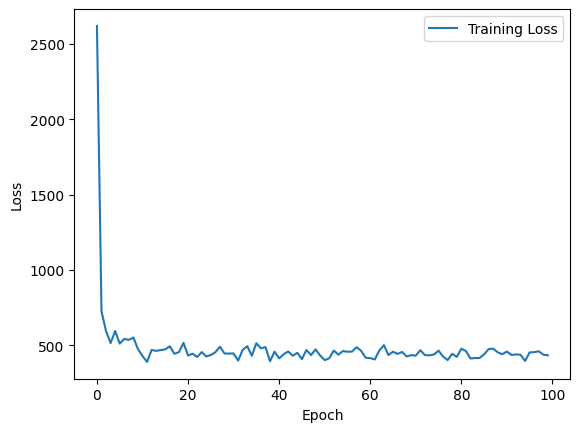

In [163]:
# 훈련 동안의 loss 변화 시각화
plt.plot(history.history['loss'])
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


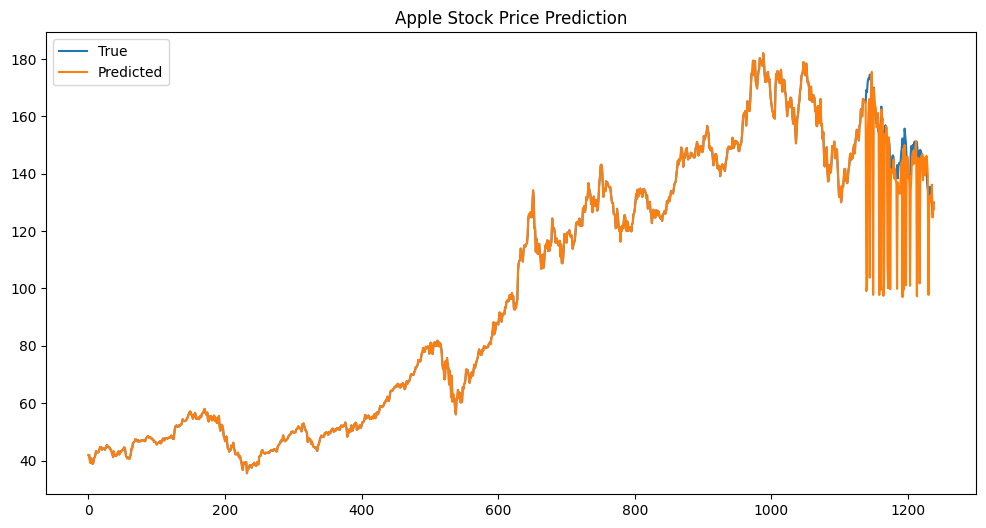

In [164]:
# 앞으로 100일동안의 주가 추이 예측
pred = model.predict(X_test)

# 예측과 실제 비교한 시각화
plt.figure(figsize=(12,6))
plt.plot(np.concatenate((y_train, y_test)), label='True')
plt.plot(np.concatenate((y_train, pred)), label='Predicted')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

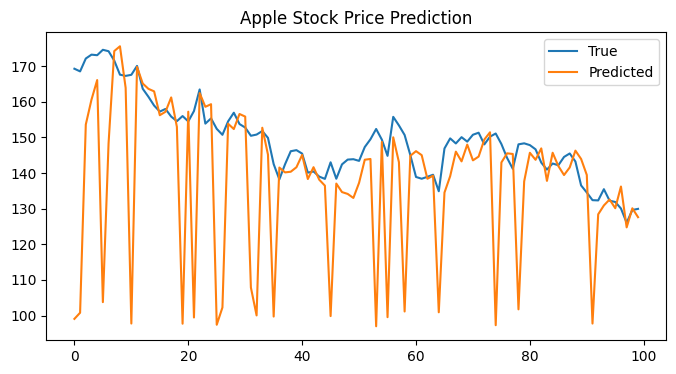

In [165]:
plt.figure(figsize=(8,4))
plt.plot(y_test, label='True')
plt.plot( pred, label='Predicted')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()